# Training ANNs

In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
sns.set_style('whitegrid')
from tensorflow.keras.utils import to_categorical


# Simple model

## The inputs and targets

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data() # Here are the data

## Inspect the data

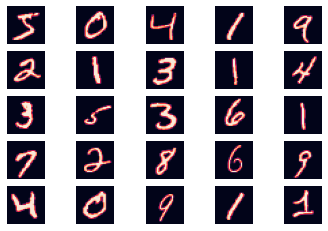

In [3]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i])
    plt.axis('off')


In [4]:
xtrain.shape, xtrain[1].shape

((60000, 28, 28), (28, 28))

In [5]:
# reshape
xtrain = xtrain.reshape(60000, 28, 28,1)
xtest = xtest.reshape(10000, 28, 28, 1)


#scaling
xtrain = (xtrain-np.min(xtrain))/(np.max(xtrain)-np.min(xtrain)).copy()
xtest = (xtest-np.min(xtest))/(np.max(xtest)-np.min(xtest)).copy() 

In [6]:
xtrain.shape, xtrain[1].shape

((60000, 28, 28, 1), (28, 28, 1))

In [7]:
# from number to categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [8]:
ytrain.shape, ytrain[1].shape

((60000, 10), (10,))

## Make the model

### Initialize model

In [9]:
# Number of Neurons
units_in= [50,120,150]  #!!!!!!   
                 
units_out=[10]          # only 10 because 10 numbers !!!!!!   

i=0
for neurons1 in units_in:
    i=i+1
    j=0
    for neurons2 in  units_out:
        j=j+1    
        model = keras.models.Sequential()

        #convolutional layer--------LeNet-5-----
        model.add(keras.layers.Conv2D(6, kernel_size=(5,5),strides=(1,1),
                   activation='relu',input_shape=(28,28,1),
                   padding='valid'))

        model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'))


        model.add(keras.layers.Conv2D(16, kernel_size=(5,5),strides=(1,1),
                   activation = 'relu', padding = 'valid'))

        model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'))


        #flatten layer------------------------
        model.add(keras.layers.Flatten(input_shape=(28, 28)))
        
        #dropout layer------------------
        model.add(keras.layers.Dropout(0.2))

        #hiden layers--------------------------
        #1
        model.add(keras.layers.Dense(units=neurons1,
                                   activation=keras.activations.relu,  #!!!!!!
                                    name='hidden_layer'))
 
                                            
        #batch normalization------------
        model.add(keras.layers.BatchNormalization(axis=-1,
        momentum=0.99,
        epsilon=0.001,
        center=False,
        scale=False,
        beta_initializer="zeros",
        gamma_initializer="ones",
        moving_mean_initializer="zeros",
        moving_variance_initializer="ones",
        beta_regularizer=None,
        gamma_regularizer=None,
        beta_constraint=None,
        gamma_constraint=None,
        renorm=False,
        renorm_clipping=None,
        renorm_momentum=0.99,
        fused=None,
        trainable=True,
        virtual_batch_size=None,
        adjustment=None,
        name=None))
        
        
        #2
        model.add(keras.layers.Dense(units=84,
                           activation=keras.activations.relu,
                            name='hidden_layer2'))
        

        #output layer-------------------------
        model.add(keras.layers.Dense(units=neurons2,
                                    activation=keras.activations.softmax,
                                    name='output_layer'))

        # compile the model -------------------
        model.compile(loss=keras.losses.categorical_crossentropy,  #!!!!!!
                     optimizer=keras.optimizers.Adam(),            #!!!!!!!
                     metrics=['accuracy'])

        # save model---------------------------
        model.save('models2/model_'+str(i)+'_'+str(j)+'_complex.h5')
        print("Saved model to disk")


Saved model to disk
Saved model to disk
Saved model to disk


## Use the model

### Make one prediction

In [10]:
xtest[6:7].shape

(1, 28, 28, 1)

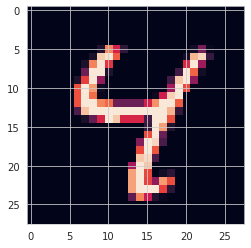

In [11]:
plt.imshow(xtest[6])   # Input

### Predict my number

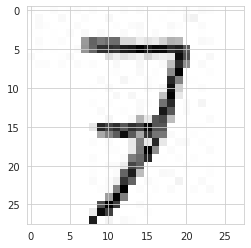

In [12]:
from PIL import Image,ImageOps

img = Image.open('seven.jpg')
plt.imshow(img)


In [13]:
img=np.array(img)
img.shape


(28, 28, 3)

In [14]:
result = img[:, :, 0] 
print(result.shape)

(28, 28)


In [15]:
img=result.reshape(1,28,28,1)
img.shape
print(img.shape)
#scaling
img = (img-np.min(img))/(np.max(img)-np.min(img)).copy()

(1, 28, 28, 1)


------------------------------------------------------------------------------------------------------------------

This is the model =  model_1_1_complex.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
hidden_layer (

Epoch 1/10
188/188 [==============================] - 11s 56ms/step - loss: 0.4072 - accuracy: 0.8740 - val_loss: 0.6077 - val_accuracy: 0.9726
Epoch 2/10
188/188 [==============================] - 11s 58ms/step - loss: 0.1068 - accuracy: 0.9666 - val_loss: 0.0919 - val_accuracy: 0.9797
Epoch 3/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0794 - accuracy: 0.9748 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 4/10
188/188 [==============================] - 13s 67ms/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.0569 - val_accuracy: 0.9817
Epoch 5/10
188/188 [==============================] - 13s 68ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 6/10
188/188 [==============================] - 12s 65ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 7/10
188/188 [==============================] - 11s 56ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0435 - val_accuracy:

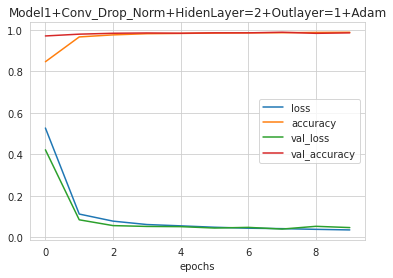

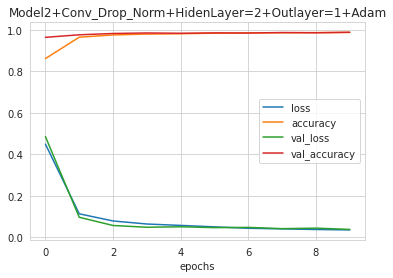

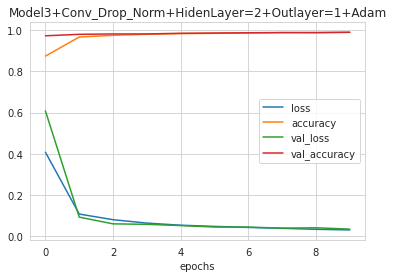

In [16]:
import os
epochs_n=10
i=0

# Stop early
cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0005,
    patience=5,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,)

with os.scandir('models2/') as entries:
    
    for entry in entries:
        i=i+1
        print('This is the model = ',entry.name)
        model = load_model(entry)      # load the model
        model.summary()                 # summaize the model
        
        history = model.fit(xtrain,     # Fit the model
                ytrain,
                epochs = epochs_n,
                batch_size = 256,       # for random subset of the data
                validation_split=0.2,   # train test validation
                callbacks=[cb])         # Stop early
        
        fig = pd.DataFrame(history.history).plot(xlabel='epochs', title='Model'+str(i)+'+Conv_Drop_Norm+HidenLayer=2+Outlayer=1+Adam').get_figure()


        fig.savefig('Figures2/fig_'+str(entry)+'_complex.jpg')

        prediction=model.predict(xtest[6:7]).round(2)  # Prediction
        print('The number is=',prediction)
        
        prediction=model.predict(img).round(2)          # Prediction
        print('The number is=',prediction)

